#  Random Forest 

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score

from sklearn import preprocessing, cross_validation  #Additional scklearn functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Manipulate Data

In [93]:

train = pd.read_csv("D:/Master ML/1-First Semester/4- Data Analysis Tools/7-kaggle_practice/kaggle_practice/train.csv")

train.drop (['MSZoning' , 'Street' , 'Alley', 'LotShape', 'LandContour' , 'Utilities' , 'LotConfig' , 'LandSlope' , 'Neighborhood',
            'Condition1' , 'Condition2', 'BldgType' , 'HouseStyle' , 'RoofStyle' , 'RoofMatl' , 'Exterior1st',
             'Exterior2nd' , 'MasVnrType' , 'ExterQual' , 'ExterCond' , 'Foundation' , 'BsmtQual' , 'BsmtCond' ,
             'BsmtExposure' , 'BsmtFinType1' , 'BsmtFinType2' , 'Heating' , 'HeatingQC' , 'CentralAir' , 'Electrical' ,
             'KitchenQual' , 'Functional' , 'FireplaceQu' , 'GarageType' , 'GarageFinish' , 'GarageQual' , 'GarageCond' , 
             'PavedDrive' , 'PoolQC' , 'Fence' , 'MiscFeature' , 'SaleCondition','Id','SaleType'
            ] , 1 , inplace = True)


train = train.replace(0, np.NaN)     # mark zero values as missing or NaN
train.fillna(0, inplace=True)
#train.dropna(inplace=True)          # mark zero values as missing or NaN  .fillna(0) - df.fillna(0)
print(train.shape)                   # summarize the number of rows and columns in the dataset

train.columns = train.columns.str.lower()  # Solving Error : DataFrame' object has no attribute 'to_numeric

train.replace('NA', -99999 , inplace =True)

(1460, 37)


# Proceeding Functions

In [94]:
x= np.array(train.drop(['saleprice'], 1))     # features
y= np.array(train['saleprice'])               # target

cv_score = x_train, x_test , y_train, y_test = cross_validation.train_test_split(x,y,test_size=0.2 , random_state = 5)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls'}
RF = RandomForestRegressor()

In [95]:
fit = RF.fit(x_train, y_train)
predxTest = fit.predict(x_test)                  # OR RF.predict(test[features])

In [96]:
r2 = r2_score(y_test, predxTest)                 # = scoreTest = RF.score(x_test,y_test)
mse = mean_squared_error(y_test, predxTest)      # Mean Square Error

In [97]:
print ("R2 Score Test - Accuracy Test : " , r2Test)
print ("Mean Square Error : " , mse)

R2 Score Test - Accuracy Test :  0.893245120143
Mean Square Error :  802211541.197


In [103]:
cv = cross_validation.cross_val_score(RF, x, y)
print ("CV Score : Mean = %.7g | Std = %.7g | Min = %.7g | Max = %.7g" %
      (np.mean(cv),np.std(cv),np.min(cv),np.max(cv)))

CV Score : Mean = -0.9329438 | Std = 0.1729698 | Min = -1.176705 | Max = -0.7933674


Notes :
-------
score 
-----
r2 = r2_score(y_test, predxTest)                 # Coefficient of determination

scoreTest = RF.score(x_test,y_test)              # Accuracy_score(y_test, predxTest)

auc = accuracy_score(y_test, predxTest)          # Not working 

---------------------------------------------------------------------

# Another Example

In [12]:
x = np.random.uniform(1, 100, 1000)
y = np.log(x) + np.random.normal(0, .3, 1000)

In [14]:
pl.scatter(x, y, s=1, label="log(x) with noise")
pl.plot(np.arange(1, 100), np.log(np.arange(1, 100)), c="b", label="log(x) true function")

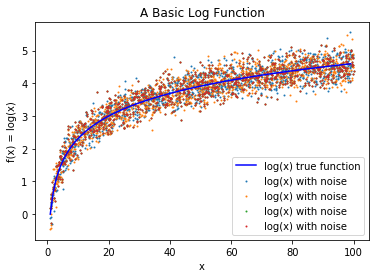

In [15]:
pl.xlabel("x")
pl.ylabel("f(x) = log(x)")
pl.legend(loc="best")
pl.title("A Basic Log Function")
pl.show()

-----------------------------------------------

# Another Example 

In [21]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)   #Factor
df.head()

train, test = df[df['is_train']==True], df[df['is_train']==False]

features = df.columns[:4]
clf = RandomForestClassifier(n_jobs=2)
y, _ = pd.factorize(train['species'])
clf.fit(train[features], y)

preds = iris.target_names[clf.predict(test[features])]
pd.crosstab(test['species'], preds, rownames=['actual'], colnames=['preds'])

preds,setosa,versicolor,virginica
actual,,,
setosa,10,0,0
versicolor,0,14,1
virginica,0,2,9


In [23]:
from sklearn.datasets import load_iris                # Load the library with the iris dataset
from sklearn.ensemble import RandomForestClassifier   # Load scikit's random forest classifier library

import pandas as pd 
import numpy as np

# Set random seed
np.random.seed(0)

In [24]:
iris = load_iris()   # Create an object called iris with the iris data
df = pd.DataFrame(iris.data, columns=iris.feature_names)  # Create a dataframe with the four feature variables

df.head()  # View the top 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
# Add a new column with the species names, this is what we are going to try to predict

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
# Create a new column that for each row, generates a random number between 0 and 1, and
# if that value is less than or equal to .75, then sets the value of that cell as True
# and false otherwise. This is a quick and dirty way of randomly assigning some rows to
# be used as the training data and some as the test data.

df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [27]:
# Create two new dataframes, one with the training rows, one with the test rows
train, test = df[df['is_train']==True], df[df['is_train']==False]

# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 118
Number of observations in the test data: 32


In [28]:
# Create a list of the feature column's names
features = df.columns[:4]

# View features
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [29]:
# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.
y = pd.factorize(train['species'])[0]

# View target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2], dtype=int64)

In [30]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [31]:
# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [35]:
# View the predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[0:10]

array([[ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0.9,  0.1,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ]])

In [37]:
# Create actual english names for the plants for each predicted plant class
preds = iris.target_names[clf.predict(test[features])]

preds[0:5]   # View the PREDICTED species for the first five observations

test['species'].head()   # View the ACTUAL species for the first five observations

7     setosa
8     setosa
10    setosa
13    setosa
17    setosa
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [40]:
pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])


Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


In [41]:
# View a list of the features and their importance scores
list(zip(train[features], clf.feature_importances_))

[('sepal length (cm)', 0.11185992930506346),
 ('sepal width (cm)', 0.016341813006098178),
 ('petal length (cm)', 0.36439533040889194),
 ('petal width (cm)', 0.5074029272799464)]

----------------------------------------------------------

# Comparing random forests and the multi-output meta estimator

C:\Users\msabe\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


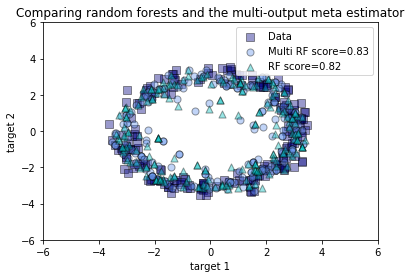

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Create a random dataset
rng = np.random.RandomState(1)
x = np.sort(200 * rng.rand(600, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(x).ravel(), np.pi * np.cos(x).ravel()]).T
y += (0.5 - rng.rand(*y.shape))

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=400, random_state=4)

max_depth = 30
regr_multirf = MultiOutputRegressor(RandomForestRegressor(max_depth=max_depth, random_state=0))
regr_multirf.fit(x_train, y_train)

regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)
regr_rf.fit(x_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(x_test)
y_rf = regr_rf.predict(x_test)

# Plot the results
plt.figure()
s = 50
a = 0.4

plt.scatter(y_test[:, 0], y_test[:, 1], edgecolor='k', c="navy", s=s, marker="s", alpha=a, label="Data")
plt.scatter(y_multirf[:, 0], y_multirf[:, 1], edgecolor='k', c="cornflowerblue", s=s, alpha=a, label="Multi RF score=%.2f" % regr_multirf.score(X_test, y_test))
plt.scatter(y_rf[:, 0], y_rf[:, 1], edgecolor='k', c="c", s=s, marker="^", alpha=a, label="RF score=%.2f" % regr_rf.score(X_test, y_test))

plt.xlim([-6, 6])
plt.ylim([-6, 6])

plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Comparing random forests and the multi-output meta estimator")
plt.legend()
plt.show()

------------------------------------------------------------------- 